In [1]:
import os
import json
import pandas as pd
from config import ratio
from functions import NoticeComparison

with open("data/database/database.json", "r") as f : 
    db = json.load(f)

df = pd.DataFrame(db.values())


path = "data/test-data/"
files = os.listdir(path)
for file in files : 
    test = pd.read_csv(path + file, encoding = "utf8", sep = "\t")
    
    comp = NoticeComparison(test.sourceUid1, test.sourceUid2, df,  ratio)
    comp.run()
    y_test = test['validation manuelle']
    stats = comp.get_stats(y_test)

    print(file)
    print(stats)
    print()

doublons-incertains-autres.tsv
{'Precision': 1.0, 'Recall': 0.125, 'f1_score': 0.222, 'confusion_matrix': array([[130,   0],
       [  7,   1]])}

doublons-incertains-avec-doi-sans-autres.tsv
{'Precision': 0.889, 'Recall': 0.533, 'f1_score': 0.667, 'confusion_matrix': array([[216,   3],
       [ 21,  24]])}

doublons-incertains-sans-doi.tsv
{'Precision': 0.833, 'Recall': 0.686, 'f1_score': 0.753, 'confusion_matrix': array([[205,   7],
       [ 16,  35]])}

doublons-incertains.tsv
{'Precision': 0.921, 'Recall': 0.729, 'f1_score': 0.814, 'confusion_matrix': array([[99,  3],
       [13, 35]])}



In [3]:
from functions import NoticeComparison
import pandas as pd
import json

with open("../../data/conditor.json", "r") as f : 
    db = json.load(f)





In [2]:
import json
filename = "../../data/conditor.json"
with open(filename, "r") as f : 
    db = json.load(f)
df = pd.DataFrame(db)
df.shape

NameError: name 'pd' is not defined

In [8]:
import os
import json
filename = "../../data/"
os.listdir(filename)
f = open(filename + "conditor.json")
dd = json.load(f)

In [1]:
dd

NameError: name 'dd' is not defined

In [55]:
from utils import getSettlement

source1 = "hal$halshs-02196766"
source2 = "hal$halshs-02155572"
t = get_notice_from_sourceUid(source2)
print(t["title"]["default"])
print(t["documentType"])
print(t["doi"])
getSettlement(t["teiBlob"])

The Role of Reputation and Competition on the Nature of Lies in Financial Markets
['COMM']
None


<meeting>
<title>EWEBE 2019, European Workshop on Experimental and Behavioral Economics</title>
<date type="start">2019-06-17</date>
<date type="end">2019-06-18</date>
<settlement>Ecully</settlement>
<country key="FR">France</country>
</meeting>

In [1]:
from utils import check_page_range

#checkPR("1544-46", "1544-15446")

441551 441550


11

In [72]:
check_page_range("1544-1550", "154")

('41550', '')


-1

In [74]:
import itertools as it
def same_begin_sequence(string1, string2) : 
    return ''.join(el[0] for el in it.takewhile(lambda t: t[0] == t[1], zip(string1, string2)))
same_begin_sequence("1550-960", "960")

''

In [9]:
x = "crossref$10.4000/ahrf.13567"
y = "hal$hal-01708398"

t1 = get_notice_from_sourceUid(x, df)
t11 = Notice(t1)

t2 = get_notice_from_sourceUid(y, df)
t22 = Notice(t2)

comp = NoticeComparison(t1, t2)
comp.run()
comp.validation_dict


IndexError: list index out of range

In [3]:
from utils import get_notice_from_sourceUid, Notice

path = "data/test-data/"
files = os.listdir(path)

#for file in files : 
test = pd.read_csv(path + files[3], encoding = "utf8", sep = "\t")
print(files[3])
d = []

for x,y, z in zip(test.sourceUid1, test.sourceUid2, test["validation manuelle"]) :

    t1 = get_notice_from_sourceUid(x, df)
    t11 = Notice(t1)

    t2 = get_notice_from_sourceUid(y, df)
    t22 = Notice(t2)

    comp = NoticeComparison(t1, t2)
    comp.run()
    res = {x:y[1] for x,y in comp.validation_dict.items()}
    res["label"] = z

    d.append(res) 

#set1 = getSettlement(t["teiBlob"])

doublons-incertains.tsv


In [4]:

df_ = pd.DataFrame(d)
#dff = pd.concat([df_, test["validation manuelle"]], ignore_index=0, axis = 0)
df_

,id,page_range,volumaison,container,content,label
0,-1,0,0,1,1,0
1,-1,-1,-1,1,1,0
2,-1,-1,-1,1,-1,0
3,0,0,0,1,-1,0
4,0,0,0,1,-1,0
...,...,...,...,...,...,...
145,0,0,0,0,1,0
146,0,0,0,0,1,0
147,1,0,0,1,1,1
148,0,0,0,0,1,0


In [7]:
from sklearn import tree
X = df_[['id', "page_range", "volumaison", "container", "content"]] 
y = df_['label']
print(X.shape, y.shape)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = clf.predict(X)

from sklearn.metrics import precision_score, recall_score

print(precision_score(y, y_pred))
print(recall_score(y, y_pred))

(150, 5) (150,)
0.9705882352941176
0.6875


In [48]:
import graphviz


dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

ModuleNotFoundError: No module named 'graphviz'

[Text(213.9, 203.85, 'X[0] <= 0.5\ngini = 0.435\nsamples = 150\nvalue = [102, 48]'),
 Text(195.3, 176.67000000000002, 'X[1] <= 0.5\ngini = 0.316\nsamples = 127\nvalue = [102, 25]'),
 Text(111.60000000000001, 149.49, 'X[0] <= -0.5\ngini = 0.238\nsamples = 116\nvalue = [100, 16]'),
 Text(93.0, 122.31, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(130.20000000000002, 122.31, 'X[3] <= -0.5\ngini = 0.303\nsamples = 86\nvalue = [70, 16]'),
 Text(111.60000000000001, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 95.13, 'X[3] <= 0.5\ngini = 0.291\nsamples = 85\nvalue = [70, 15]'),
 Text(74.4, 67.94999999999999, 'X[4] <= 0.0\ngini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(37.2, 40.77000000000001, 'X[1] <= -0.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(18.6, 13.590000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(55.800000000000004, 13.590000000000003, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(111.60000000000001, 40.77000000000001, '

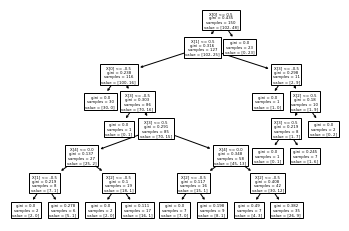

In [8]:
tree.plot_tree(clf) 

In [5]:
keys = t11.__dict__.keys()
for key in keys :
    #if key != "teiBlob":
    print(key)
    print(getattr(t11, key))
    print(getattr(t11, key)) 
    print()
copy.deepcopy(notice_test)

doi
10.1186/s13063-016-1211-x
10.1186/s13063-016-1211-x

default_title
Reduction of self-perceived discomforts in critically ill patients in French intensive care units: study protocol for a cluster-randomized controlled trial.
Reduction of self-perceived discomforts in critically ill patients in French intensive care units: study protocol for a cluster-randomized controlled trial.

meeting



journal
Trials
Trials

publi_date
2016-02-16
2016-02-16

page_range
87
87

issue
None
None

source
pubmed
pubmed

doc_type
Journal Article
Journal Article

issn
[]
[]

eissn
['1745-6215']
['1745-6215']

nnt
None
None

settlement
None
None

volume
17
17

type_conditor
Article
Article

sourceUid
pubmed$26880373
pubmed$26880373



In [24]:
import base64
from bs4 import BeautifulSoup

def decode_b64(teiblob) : 
    tb_decoded = base64.b64decode(teiblob).decode('utf8')
    soup = BeautifulSoup(tb_decoded, "lxml")
    return soup